# Notes

*p-value* - possibility of Null Hypothesis negation <br />
*alpha* - specified meaningfullness of the test, based on this value we choose if we can discard null hypothesis <br />
*z-score* - standardized value for specified x of given distribution <br />
*t-student* - similar to z-score, but estimates better for smaller samples <br />

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import scipy
import scipy.stats as stats
import seaborn as sns
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

In [52]:
help(utils)

Help on package utils:

NAME
    utils

PACKAGE CONTENTS


FILE
    c:\users\filip\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\utils\__init__.py




# Task 1

In [63]:
df = pd.read_csv("wyniki.csv")
df.describe()

,ocena_koncowa
count,357.000000
mean,11.523810
std,3.227797
min,4.000000
25%,9.000000
50%,11.000000
75%,14.000000
max,20.000000


## T-Test

In [64]:
# Hyperparams for T-Test
# null_hypothesis - there is no significant grades difference between male and female students
# alternative hypothesis - there is a significant grades difference between male and female students
# H0 = uM = uF
# H1 = uM != uF
alpha = 0.05

df_male = df[df['plec'] == 'M']['ocena_koncowa']
df_female = df[df['plec'] == 'F']['ocena_koncowa']

numerosity_male = df_male.shape[0]
numerosity_female = df_female.shape[0]

sample_std_male = np.std(df_male)
sample_std_female = np.std(df_female)

sample_mean_male = np.mean(df_male)
sample_mean_female = np.mean(df_female)

print(f"Male stats - n = {numerosity_male}, stdev = {sample_std_male}, smean = {sample_mean_male}")
print(f"Female stats - n = {numerosity_female}, stdev = {sample_std_female}, smean = {sample_mean_female}")

t_statistic = ( (sample_mean_male - sample_mean_female) / (np.sqrt(((sample_std_male**2) / numerosity_male) + ((np.square(sample_std_female**2)) / numerosity_female))) )

print(f"T-Statistic for 2 samples: {t_statistic}")

degrees_of_freedom = min([numerosity_male, numerosity_female]) - 1

p_value = stats.t.sf(abs(t_statistic), df=degrees_of_freedom)

print(f"P-Value: {p_value}")

reject_null_hypothesis = p_value < alpha
print(f"Can we reject Null Hypothesis? {reject_null_hypothesis}")

# If reject_null_hypothesis is False, then for 95% we cannot reject Null Hypothesis, otherwise we can say it's most likely discardable.
# Our analysis showed, that we cannot reject Null Hypothesis, so there is no significant grades difference between male and female students.

Male stats - n = 172, stdev = 3.249261471191042, smean = 11.866279069767442
Female stats - n = 185, stdev = 3.1658606230052366, smean = 11.205405405405406
T-Statistic for 2 samples: 0.8500895288562739
P-Value: 0.19823199185481255
Can we reject Null Hypothesis? False


# Task 2

In [65]:
df_incomes = pd.read_csv("ZyskiFirmyX.csv")
df_incomes.describe()

,Rok,Zysk
count,200.000000,200.000000
mean,1920.500000,1021.990000
std,57.879185,487.955626
min,1821.000000,-413.000000
25%,1870.750000,724.250000
50%,1920.500000,1024.000000
75%,1970.250000,1318.250000
max,2020.000000,2055.000000


### Show Income in Time

In [99]:
df_incomes_histogram = df_incomes.copy()

df_incomes_histogram["Color"] = np.where(df_incomes_histogram["Zysk"] < 0, 'red', 'green')

fig = go.Figure()
fig.add_trace(
    go.Bar(
        name='Income per Year',
        x=df_incomes_histogram['Rok'],
        y=df_incomes_histogram['Zysk'],
        marker_color=df_incomes_histogram['Color']
    )
)
fig.update_layout(
    barmode='stack',
    xaxis=dict(
        dtick = 10
    ),
    title='Income per Year'
)
fig.show()

We can see that the incomes are going down after a good years, it is not stable, but all the time the Company is able to make it again.

## Linear regression

In [140]:
model = smf.ols(formula="Zysk ~ Rok", data=df_incomes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Sun, 22 Jan 2023   Prob (F-statistic):              0.760
Time:                        11:35:25   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1373.8795   1150.888      1.194      0.2

In [144]:
# Add fitted values to data and get Linear Regression formula
df_incomes_histogram["fitted"] = model.fittedvalues
slope, intercept, r_value, p_value, std_err = stats.linregress(df_incomes_histogram["Rok"], df_incomes_histogram["fitted"])


fig = go.Figure()
fig.add_trace(
    go.Bar(
        name='Income per Year',
        x=df_incomes_histogram['Rok'],
        y=df_incomes_histogram['Zysk'],
        marker_color=df_incomes_histogram['Color']
    )
)
fig.add_trace(
    go.Scatter(
        x=df_incomes_histogram["Rok"], 
        y=df_incomes_histogram["fitted"], 
        name="Fitted Regression Line"
    )
)
fig.add_annotation(dict(
    font=dict(
        color='blue', size=15
    ),
    x=0.005,
    y=-0.23,
    text=f"Regression line formula: y = {round(slope, 3)}x + {round(intercept, 2)}",
    textangle=0,
    xanchor='left',
    xref="paper",
    yref="paper"
))

fig.update_layout(
    barmode='stack',
    title='Income per Year',
    xaxis=dict(
        dtick = 10
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(l=20, r=20, t=20, b=60)
)



fig.show()

Based on a given line we can see, that the Company over time seems to have stable income, but regression line shows a very small decrease in expected total income every year.
Given the facts, that World grows as well as inflates we can say that, having only and only Income as a known factor, the Company is barely makes it to another decade.

# Task 3

In [181]:
df_spending_scores = pd.read_csv("spendingscores.csv")
df_spending_scores['Gender'] = df_spending_scores['Gender'].replace({
    "Male" : 0,
    "Female" : 1
})
df_spending_scores.describe()
df_spending_scores

,Gender,Age,AnnualIncome,SpendingScore
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


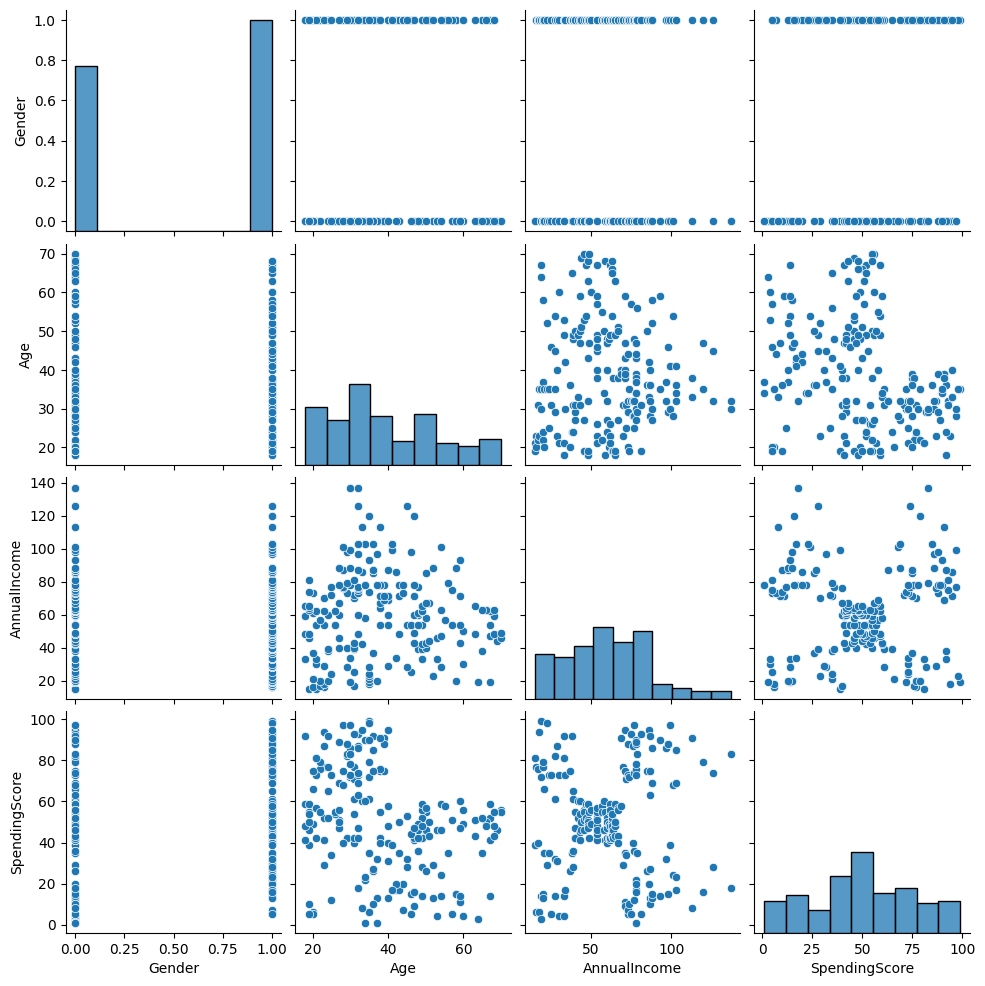

In [188]:
sns.pairplot(df_spending_scores)

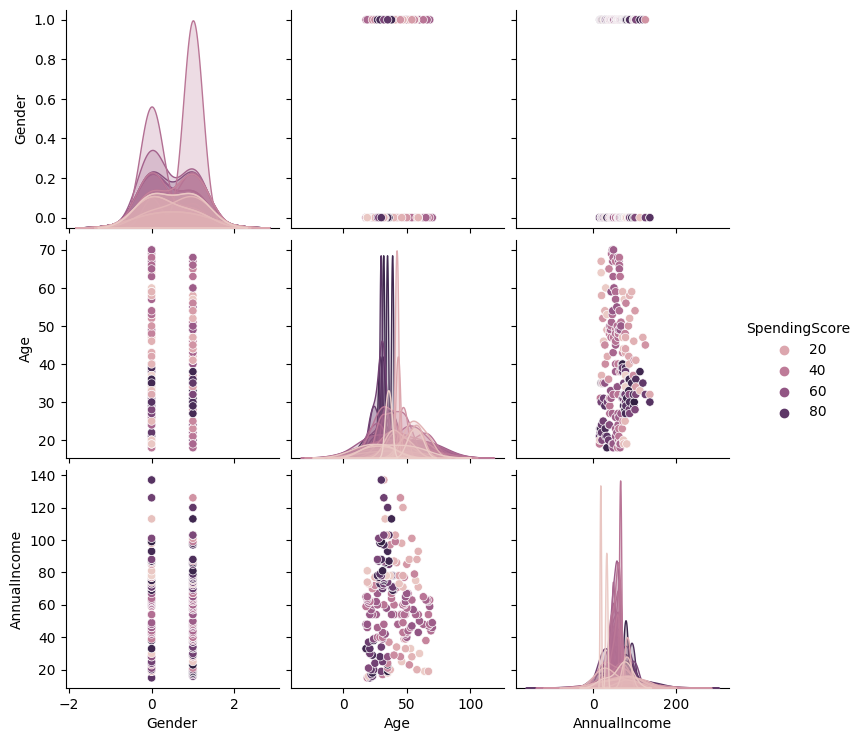

In [187]:
sns.pairplot(df_spending_scores, hue="SpendingScore")

In [183]:
model_spending_scores = smf.ols(formula="SpendingScore ~ Gender + Age + AnnualIncome", data=df_spending_scores).fit()
print(f"""
Models statistics:
P-Values = \n{model_spending_scores.pvalues}, 
Standard Deviations = {model_spending_scores.bse.values},
Coefficients = {model_spending_scores.params.values}
""")
print(model_spending_scores.summary())


Models statistics:
P-Values = 
Intercept       5.500974e-20
Gender          5.671172e-01
Age             3.055177e-06
AnnualIncome    9.050939e-01
dtype: float64, 
Standard Deviations = [7.02279453 3.51182541 0.12491583 0.06641961],
Coefficients = [ 7.19167998e+01  2.01323375e+00 -6.00371040e-01  7.92939510e-03]

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        12:14:53   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3               

In [184]:
corr = df_spending_scores.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\Filip\AppData\Local\Temp\ipykernel_19044\225079182.py:4: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Gender,Age,AnnualIncome,SpendingScore
Gender,1.000,-0.061,-0.056,0.058
Age,-0.061,1.000,-0.012,-0.327
AnnualIncome,-0.056,-0.012,1.000,0.010
SpendingScore,0.058,-0.327,0.010,1.000


There is a noticeable correlation between Age and SpendingScore, but surprisingly not much between other variables.

In [189]:
df_spending_scores_without_AnnualIncome = df_spending_scores.drop(columns=['AnnualIncome'])

model_spending_scores = smf.ols(formula="SpendingScore ~ Gender + Age", data=df_spending_scores_without_AnnualIncome).fit()
print(f"""
Models statistics:
P-Values = \n{model_spending_scores.pvalues}, 
Standard Deviations = {model_spending_scores.bse.values},
Coefficients = {model_spending_scores.params.values}
""")
print(model_spending_scores.summary())

corr = df_spending_scores_without_AnnualIncome.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm').set_precision(3)


Models statistics:
P-Values = 
Intercept    4.641461e-28
Gender       5.701457e-01
Age          2.852827e-06
dtype: float64, 
Standard Deviations = [5.60533672 3.49727772 0.12458719],
Coefficients = [72.41965508  1.989221   -0.60060795]

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.99
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           1.22e-05
Time:                        12:23:04   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust             

C:\Users\Filip\AppData\Local\Temp\ipykernel_19044\3846241454.py:13: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Gender,Age,SpendingScore
Gender,1.000,-0.061,0.058
Age,-0.061,1.000,-0.327
SpendingScore,0.058,-0.327,1.000
